# Reglas de Asociación: arulesViz R-package

### Santander Meteorology Group

La librería [arulesViz](https://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf) desarrollada por [IDA@SMU](http://lyle.smu.edu/IDA/arules/) considera diferentes técnicas para la obtención y visualización de reglas de asociación a partir de un conjunto de datos, así como herramientas para explorar dichas reglas.

El objetivo de la presente tarea es familiarizar a los alumnos con el manejo de librería en el marco de R, así como presentar este tipo de algoritmos de aprendizaje el cual, a pesar de no profundizar en el presente curso en él, presenta diversas aplicaciones y nos servirá de introducción a los modelos probabilísticos que analizaremos en profundidad.

## Instalación de la librería arulesViz

Dado que la librería está incluida en el CRAN ([The Comprehensive R Archive Network](https://cran.r-project.org/)), el respositorio central de librerías de R, la instalación puede realizarse a través del comando `install.package`. En caso de tener ya instalado el paquete no hace falta instalarlo de nuevo y basta con activarlo con el comando `library`.

In [1]:
# If we have not installed the "arulesViz" library we should do it:
# install.packages("arulesViz")
library(arulesViz)

Loading required package: arules
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


Nota que la instalación de la libería requiere de la instalación de sus dependencias. En particular de la librería `arules`, la cual se activa al activar `arulesViz`.

## Ejemplo realizado en clase:

Inicialmente consideraremos el ejemplo realizado en clase para familiarizarnos con los comandos y sus opciones para luego aplicarlo en un problema más general. Para ello, primero definiremos la tabla de transacciones del problema:

In [2]:
table <- list(c("p","l","O","b"), c("p","l"), c("p","O","c"), c("p","l","O","c"))
transactions <- as(table, "transactions")
inspect(transactions)

    items    
[1] {b,l,O,p}
[2] {l,p}    
[3] {c,O,p}  
[4] {c,l,O,p}


Podemos ver el soporte, absoluto o relativo: de cada item:

b c l O p 
1 2 3 3 4

b    c    l    O    p 
0.25 0.50 0.75 0.75 1.00

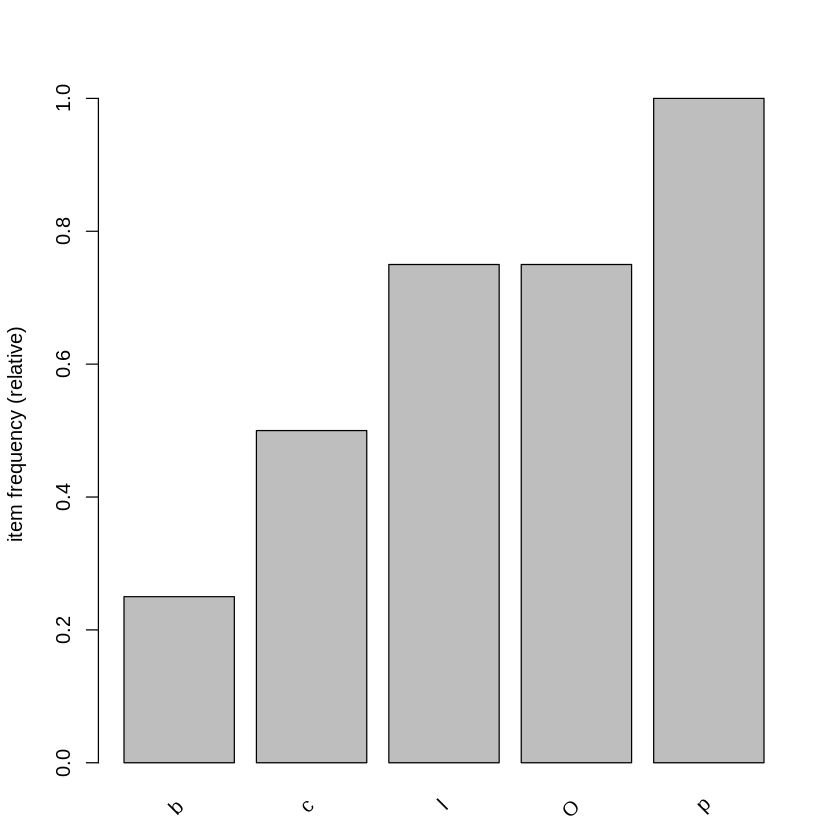

In [3]:
itemFrequency(transactions, type="a")
itemFrequency(transactions, type="r")
itemFrequencyPlot(transactions)

Una vez definida la tabla de transacciones, buscaremos los itemsets más frecuentes a través de los dos algoritmos explicados, APRIORI

::GMG::Apriori no se aplica la conf(ianza) y se requiere un nivel de supp(ort(e)) mayor que cero
::GMG::Eclat fijamos el másximo número de itemsets que son todos en este caso y el eclat quita directamente los que tienen soporte cero (!!)

In [4]:
iApriori <- apriori(transactions, parameter = list(supp=0, conf=0, target = "frequent itemsets"))
inspect(iApriori)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5       0      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [30 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items     support count
[1]  {b}       0.25    1    
[2]  {c}       0.50    2    
[3]  {l}       0.75    3    
[4]  {O}       0.75    3    
[5]  {p}       1.00    4    
[6]  {b,c}     0.00    0    
[7]  {b,l}     0.25    1    
[8]  {b,O}     0.25    1    
[9]  {b,p}

In [6]:
iEclat <- eclat(transactions, parameter = list(support = 0, maxlen = 5, tidLists = TRUE))
inspect(iEclat)

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
     TRUE       0      1      5 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 0 



Warning message in eclat(transactions, parameter = list(support = 0, maxlen = 5, :
“You chose a very low absolute support count of 0. You might run out of memory! Increase minimum support.
”

create itemset ... 
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating bit matrix ... [5 row(s), 4 column(s)] done [0.00s].
writing  ... [23 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items     support count
[1]  {b,l,O,p} 0.25    1    
[2]  {b,l,p}   0.25    1    
[3]  {b,l,O}   0.25    1    
[4]  {b,O,p}   0.25    1    
[5]  {b,p}     0.25    1    
[6]  {b,O}     0.25    1    
[7]  {b,l}     0.25    1    
[8]  {c,l,O,p} 0.25    1    
[9]  {c,l,p}   0.25    1    
[10] {c,l,O}   0.25    1    
[11] {c,O,p}   0.50    2    
[12] {c,p}     0.50    2    
[13] {c,O}     0.50    2    
[14] {c,l}     0.25    1    
[15] {l,O,p}   0.50    2    
[16] {l,p}     0.75    3    
[17] {l,O}     0.50    2    
[18] {O,p}     0.75    3    
[19] {p}       1.00    4    
[20] {O}       0.75    3    
[21] {l}       0.75    3    
[22] {c}       0.50    2    
[23] {b}       0.25    1    


Notar que ECLAT suprime aquellos itemsets que no ocurren mientras que, si no se establecen restricciones, APRIORI devuelve todas las combinaciones, salvo el conjunto vacío y el total. Podemos filtrar las transacciones según incluyan ciertos productos con la función subset. La sintaxis `%in%`, `%ain%` y `%pin%`, define que incluyan alguno, todos o parte de los items incluidos en la lista.

::GMG::consultas sobre elmentos que están in (?), ain (totalmente) o pin (parcialmente)

In [7]:
inspect(subset(iApriori, subset = items %in% c("b","l")))

     items     support count
[1]  {b}       0.25    1    
[2]  {l}       0.75    3    
[3]  {b,c}     0.00    0    
[4]  {b,l}     0.25    1    
[5]  {b,O}     0.25    1    
[6]  {b,p}     0.25    1    
[7]  {c,l}     0.25    1    
[8]  {l,O}     0.50    2    
[9]  {l,p}     0.75    3    
[10] {b,c,l}   0.00    0    
[11] {b,c,O}   0.00    0    
[12] {b,c,p}   0.00    0    
[13] {b,l,O}   0.25    1    
[14] {b,l,p}   0.25    1    
[15] {b,O,p}   0.25    1    
[16] {c,l,O}   0.25    1    
[17] {c,l,p}   0.25    1    
[18] {l,O,p}   0.50    2    
[19] {b,c,l,O} 0.00    0    
[20] {b,c,l,p} 0.00    0    
[21] {b,c,O,p} 0.00    0    
[22] {b,l,O,p} 0.25    1    
[23] {c,l,O,p} 0.25    1    


In [8]:
inspect(subset(iApriori, subset = items %ain% c("b","l")))

    items     support count
[1] {b,l}     0.25    1    
[2] {b,c,l}   0.00    0    
[3] {b,l,O}   0.25    1    
[4] {b,l,p}   0.25    1    
[5] {b,c,l,O} 0.00    0    
[6] {b,c,l,p} 0.00    0    
[7] {b,l,O,p} 0.25    1    


In [9]:
inspect(subset(iApriori, subset = items %pin% c("b","l")))

Warning message in items %pin% c("b", "l"):
“table contains more than one item label pattern and only the first element will be used”

     items     support count
[1]  {b}       0.25    1    
[2]  {b,c}     0.00    0    
[3]  {b,l}     0.25    1    
[4]  {b,O}     0.25    1    
[5]  {b,p}     0.25    1    
[6]  {b,c,l}   0.00    0    
[7]  {b,c,O}   0.00    0    
[8]  {b,c,p}   0.00    0    
[9]  {b,l,O}   0.25    1    
[10] {b,l,p}   0.25    1    
[11] {b,O,p}   0.25    1    
[12] {b,c,l,O} 0.00    0    
[13] {b,c,l,p} 0.00    0    
[14] {b,c,O,p} 0.00    0    
[15] {b,l,O,p} 0.25    1    


Notar que en el último caso, el orden de los items es relevante.

Como hemos visto, una vez obtenidos los itemsets a partir de ellos construimos las reglas de asociación en base a las restricciones que definamos. En el caso del algoritmo APRIORI la función permite obtener las reglas como salida. Sin embargo, el algoritmo ECLAT únicamente devuelve los itemsets y las reglas de asociación deben inducirse con la función `ruleInduction`.

::GMG::sacamos todos (greedy) ... no filtramos

In [10]:
rApriori <- apriori(transactions, parameter = list(supp=0, conf=0, target = "rules"))
inspect(rApriori)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [75 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs        rhs support confidence lift      count
[1]  {}      => {b} 0.25    0.2500000  1.0000000 1    
[2]  {}      => {c} 0.50    0.5000000  1.0000000 2    
[3]  {}      => {l} 0.75    0.7500000  1.0000000 3    
[4]  {}      => {O} 0.75    0.7500000  1.0000000 3    
[5]  {}      => {

La inclusión de reglas cuyo antecedente (`lhs`: left hand side) es el conjunto vacío (`{}`) pueden fitrarse incluyendo restricciones respecto a la longitud mínima (`minlen`).

In [11]:
rApriori <- apriori(transactions, parameter = list(supp=0, conf=0, target = "rules", minlen=2))
inspect(rApriori)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs        rhs support confidence lift      count
[1]  {b}     => {c} 0.00    0.0000000  0.0000000 0    
[2]  {c}     => {b} 0.00    0.0000000  0.0000000 0    
[3]  {b}     => {l} 0.25    1.0000000  1.3333333 1    
[4]  {l}     => {b} 0.25    0.3333333  1.3333333 1    
[5]  {b}     => {

En el caso de ECLAT, como vimos, hay que hacer uso de funciones específicas de obtención de reglas:

::GMG::Aquí no tengo la obtención directa de reglas (?)

In [12]:
rEclat <- ruleInduction(iEclat, transactions, confidence = 0, control = list(method = "ptree", reduce = TRUE))
inspect(rEclat)

     lhs        rhs support confidence lift      itemset
[1]  {l,O,p} => {b} 0.25    0.5000000  2.0000000  1     
[2]  {b,O,p} => {l} 0.25    1.0000000  1.3333333  1     
[3]  {b,l,p} => {O} 0.25    1.0000000  1.3333333  1     
[4]  {b,l,O} => {p} 0.25    1.0000000  1.0000000  1     
[5]  {l,p}   => {b} 0.25    0.3333333  1.3333333  2     
[6]  {b,p}   => {l} 0.25    1.0000000  1.3333333  2     
[7]  {b,l}   => {p} 0.25    1.0000000  1.0000000  2     
[8]  {l,O}   => {b} 0.25    0.5000000  2.0000000  3     
[9]  {b,O}   => {l} 0.25    1.0000000  1.3333333  3     
[10] {b,l}   => {O} 0.25    1.0000000  1.3333333  3     
[11] {O,p}   => {b} 0.25    0.3333333  1.3333333  4     
[12] {b,p}   => {O} 0.25    1.0000000  1.3333333  4     
[13] {b,O}   => {p} 0.25    1.0000000  1.0000000  4     
[14] {p}     => {b} 0.25    0.2500000  1.0000000  5     
[15] {b}     => {p} 0.25    1.0000000  1.0000000  5     
[16] {O}     => {b} 0.25    0.3333333  1.3333333  6     
[17] {b}     => {O} 0.25    1.0

Al filtrar ciertos items e incluir la reducción en el algoritmo notar que el número de reglas que aparecen en el algoritmo ECLAT es sensiblemente inferior al obtenido en el algoritmo APRIORI.

Al inspeccionar el objeto, bien con las reglas bien con los itemsets, se muestran por defecto tres parámetros, support, confidence y lift, si bien se pueden obtener un gran número de medidas de interés alternativas, gran parte de las cuales pueden usarse también en el proceso de aprendizaje:

In [13]:
interestMeasure(rEclat, c("support", "chiSquare", "confidence", "conviction","cosine", "coverage", "leverage", "lift", "oddsRatio"), transactions)

support,chiSquared,confidence,conviction,cosine,coverage,leverage,lift,oddsRatio
0.25,1.3333333,0.5000000,1.500,0.7071068,0.50,0.1250,2.0000000,NA
0.25,0.4444444,1.0000000,NA,0.5773503,0.25,0.0625,1.3333333,NA
0.25,0.4444444,1.0000000,NA,0.5773503,0.25,0.0625,1.3333333,NA
0.25,NA,1.0000000,NA,0.5000000,0.25,0.0000,1.0000000,NA
0.25,0.4444444,0.3333333,1.125,0.5773503,0.75,0.0625,1.3333333,NA
0.25,0.4444444,1.0000000,NA,0.5773503,0.25,0.0625,1.3333333,NA
0.25,NA,1.0000000,NA,0.5000000,0.25,0.0000,1.0000000,NA
0.25,1.3333333,0.5000000,1.500,0.7071068,0.50,0.1250,2.0000000,NA
0.25,0.4444444,1.0000000,NA,0.5773503,0.25,0.0625,1.3333333,NA
0.25,0.4444444,1.0000000,NA,0.5773503,0.25,0.0625,1.3333333,NA


Si bien no hemos realizado ningún filtro a las reglas obtenidas, más allá de las impuestas por los algoritmos de aprendizaje, es habitual obtener reglas redundantes la cuales debemos filtrar. Para ello, la función `is.redundant` nos permite localizar estas redundancias:

::GMG::Sacamos las redundancias (todavía no hemos filtrado) ... lhs -> rhs (antecedente -> consecuente)

In [14]:
indRedundantApriori <- which(is.redundant(rApriori))
inspect(rApriori[indRedundantApriori])

     lhs        rhs support confidence lift      count
[1]  {b,c}   => {l} 0.00    1.0000000  1.3333333 0    
[2]  {b,l}   => {c} 0.00    0.0000000  0.0000000 0    
[3]  {c,l}   => {b} 0.00    0.0000000  0.0000000 0    
[4]  {b,c}   => {O} 0.00    1.0000000  1.3333333 0    
[5]  {b,O}   => {c} 0.00    0.0000000  0.0000000 0    
[6]  {c,O}   => {b} 0.00    0.0000000  0.0000000 0    
[7]  {b,c}   => {p} 0.00    1.0000000  1.0000000 0    
[8]  {b,p}   => {c} 0.00    0.0000000  0.0000000 0    
[9]  {c,p}   => {b} 0.00    0.0000000  0.0000000 0    
[10] {b,l}   => {O} 0.25    1.0000000  1.3333333 1    
[11] {b,O}   => {l} 0.25    1.0000000  1.3333333 1    
[12] {b,l}   => {p} 0.25    1.0000000  1.0000000 1    
[13] {b,p}   => {l} 0.25    1.0000000  1.3333333 1    
[14] {l,p}   => {b} 0.25    0.3333333  1.3333333 1    
[15] {b,O}   => {p} 0.25    1.0000000  1.0000000 1    
[16] {b,p}   => {O} 0.25    1.0000000  1.3333333 1    
[17] {O,p}   => {b} 0.25    0.3333333  1.3333333 1    
[18] {c,l}

Procedemos a filtrar dichas redes e inspeccionamos de nuevo las reglas obtenidas con el algoritmo APRIORI

In [16]:
rAprioriFiltered <- rApriori[!is.redundant(rApriori)]
inspect(rAprioriFiltered)

     lhs      rhs support confidence lift      count
[1]  {b}   => {c} 0.00    0.0000000  0.0000000 0    
[2]  {c}   => {b} 0.00    0.0000000  0.0000000 0    
[3]  {b}   => {l} 0.25    1.0000000  1.3333333 1    
[4]  {l}   => {b} 0.25    0.3333333  1.3333333 1    
[5]  {b}   => {O} 0.25    1.0000000  1.3333333 1    
[6]  {O}   => {b} 0.25    0.3333333  1.3333333 1    
[7]  {b}   => {p} 0.25    1.0000000  1.0000000 1    
[8]  {p}   => {b} 0.25    0.2500000  1.0000000 1    
[9]  {c}   => {l} 0.25    0.5000000  0.6666667 1    
[10] {l}   => {c} 0.25    0.3333333  0.6666667 1    
[11] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[12] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[13] {c}   => {p} 0.50    1.0000000  1.0000000 2    
[14] {p}   => {c} 0.50    0.5000000  1.0000000 2    
[15] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[16] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[17] {l}   => {p} 0.75    1.0000000  1.0000000 3    
[18] {p}   => {l} 0.75    0.7500000  1.0000000

y con el algoritmo ECLAT

In [17]:
rEclatFiltered <- rEclat[!is.redundant(rEclat)]
inspect(rEclatFiltered)

     lhs      rhs support confidence lift      itemset
[1]  {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2]  {p}   => {b} 0.25    0.2500000  1.0000000  5     
[3]  {b}   => {p} 0.25    1.0000000  1.0000000  5     
[4]  {O}   => {b} 0.25    0.3333333  1.3333333  6     
[5]  {b}   => {O} 0.25    1.0000000  1.3333333  6     
[6]  {l}   => {b} 0.25    0.3333333  1.3333333  7     
[7]  {b}   => {l} 0.25    1.0000000  1.3333333  7     
[8]  {p}   => {c} 0.50    0.5000000  1.0000000 12     
[9]  {c}   => {p} 0.50    1.0000000  1.0000000 12     
[10] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[11] {c}   => {O} 0.50    1.0000000  1.3333333 13     
[12] {l}   => {c} 0.25    0.3333333  0.6666667 14     
[13] {c}   => {l} 0.25    0.5000000  0.6666667 14     
[14] {p}   => {l} 0.75    0.7500000  1.0000000 16     
[15] {l}   => {p} 0.75    1.0000000  1.0000000 16     
[16] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[17] {l}   => {O} 0.50    0.6666667  0.8888889 17     
[18] {p}  

Finalmente, podemos resolver dudas como las siguientes: 
* Encontrar todas las reglas relacionando cualquier producto con uno dado (p.e. O - Naranja).

In [18]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O")))

    lhs    rhs support confidence lift      count
[1] {b} => {O} 0.25    1.0000000  1.3333333 1    
[2] {c} => {O} 0.50    1.0000000  1.3333333 2    
[3] {l} => {O} 0.50    0.6666667  0.8888889 2    
[4] {p} => {O} 0.75    0.7500000  1.0000000 3    


In [19]:
inspect(subset(rEclatFiltered, subset = rhs %in% c("O")))

    lhs    rhs support confidence lift      itemset
[1] {b} => {O} 0.25    1.0000000  1.3333333  6     
[2] {c} => {O} 0.50    1.0000000  1.3333333 13     
[3] {l} => {O} 0.50    0.6666667  0.8888889 17     
[4] {p} => {O} 0.75    0.7500000  1.0000000 18     


* Encontrar todas las reglas que dependen de un producto dado (p.e. O - Naranja).

In [20]:
inspect(subset(rAprioriFiltered, subset = lhs %in% c("O")))

    lhs      rhs support confidence lift      count
[1] {O}   => {b} 0.25    0.3333333  1.3333333 1    
[2] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[3] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[4] {O}   => {p} 0.75    1.0000000  1.0000000 3    
[5] {l,O} => {b} 0.25    0.5000000  2.0000000 1    


In [21]:
inspect(subset(rEclatFiltered, subset = lhs %in% c("O")))

    lhs      rhs support confidence lift      itemset
[1] {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2] {O}   => {b} 0.25    0.3333333  1.3333333  6     
[3] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[4] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[5] {O}   => {p} 0.75    1.0000000  1.0000000 18     


* Encontrar todas las reglas que cumplan los dos criterios anteriores para ciertos productos dados.

::GMG::usamos condiciones lógicas sobre antecedente (lhs) y consecuentes (rhs)

In [22]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O") | lhs %in% c("O")))

    lhs      rhs support confidence lift      count
[1] {b}   => {O} 0.25    1.0000000  1.3333333 1    
[2] {O}   => {b} 0.25    0.3333333  1.3333333 1    
[3] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[4] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[5] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[6] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[7] {O}   => {p} 0.75    1.0000000  1.0000000 3    
[8] {p}   => {O} 0.75    0.7500000  1.0000000 3    
[9] {l,O} => {b} 0.25    0.5000000  2.0000000 1    


In [23]:
inspect(subset(rEclatFiltered, subset = rhs %in% c("O") | lhs %in% c("O")))

    lhs      rhs support confidence lift      itemset
[1] {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2] {O}   => {b} 0.25    0.3333333  1.3333333  6     
[3] {b}   => {O} 0.25    1.0000000  1.3333333  6     
[4] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[5] {c}   => {O} 0.50    1.0000000  1.3333333 13     
[6] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[7] {l}   => {O} 0.50    0.6666667  0.8888889 17     
[8] {p}   => {O} 0.75    0.7500000  1.0000000 18     
[9] {O}   => {p} 0.75    1.0000000  1.0000000 18     


* Encontrar el conjunto de reglas con mayor confianza cumpliendo alguno de los criterios anteriores.

In [ ]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O") | lhs %in% c("O") & confidence >= 0.5))
inspect(subset(rEclatFiltered, subset = rhs %in% c("O") | lhs %in% c("O") & confidence >= 0.5))

* Consultar el conjunto de reglas con alguno de los parámetros con valores más altos (`head`) o bajos (`tail`)

In [ ]:
inspect(head(sort(rAprioriFiltered, by ="lift"),3))
inspect(head(sort(rEclatFiltered, by ="lift"),3))
inspect(tail(sort(rAprioriFiltered, by ="lift"),3))
inspect(tail(sort(rEclatFiltered, by ="lift"),3))

Finalmente, una vez obtenidas las reglas de asociación, podemos visualizar los resultados:
- Matriz de itemsets:

In [ ]:
image(iApriori@items, xlab = "Items", ylab = "Itemsets")
image(iEclat@items, xlab = "Items", ylab = "Itemsets")

- Scatter-plot de reglas:

In [ ]:
plot(rAprioriFiltered)
plot(rEclatFiltered)

- Matriz de asociaciones:

In [ ]:
plot(rAprioriFiltered, method="matrix", measure="lift")
plot(rEclatFiltered, method="matrix", measure="lift")

- Matriz de asociaciones incluyendo parámetros:

In [ ]:
plot(rAprioriFiltered, method="grouped", measure="lift")
plot(rEclatFiltered, method="grouped", measure="support")

- Enlaces de las reglas:

In [ ]:
plot(rAprioriFiltered, method="paracoord")
plot(rEclatFiltered, method="paracoord")

- Estadística de una regla en particular:

In [ ]:
oneRule <- sample(rAprioriFiltered, 1)
plot(oneRule, method="doubledecker", data = transactions)
oneRule <- sample(rEclatFiltered, 1)
plot(oneRule, method="doubledecker", data = transactions)

## Base de datos Groceries

En la presente tarea trabajaremos con la base de datos `Groceries`, disponibles públicamente para su uso desde R. Para una breve descripción de esta base de datos puede recurrir a la ayuda de R.

In [ ]:
# Help command in R: ?
? Groceries
# Loading the dataset
data(Groceries)
Groceries@itemInfo$labels

¿Cuantas transacciones y clases contiene el dataset?

In [ ]:
# Incluye el código para responder a la cuestion anterior. ? str

Notar que, para inspeccionar el objeto, hemos usado en un caso el símbolo arroba (`@`) y en otro el dolar (`$`). Esto se debe a que en el primer caso es un objeto tipo S3 ó S4, mientras que en el segundo caso es una colección de datos o `data.frame`.

# Aprendiendo de los datos: Algoritmo A Priori

In [ ]:
? apriori

Las reglas de asociación son implicaciones de la forma `X=>Y`, las cuales se fundamentan en dos conceptos básicos: la confianza y la relevancia. El primero es la proporción de registros con `X` que contienen también `Y`, mientras que el segundo es el número de registros que contienen tanto X como Y. Dada una relevancia mínima `Rmin`, el algoritmo a priori consta de 6 pasos:

 * Definimos `i=1`, que se corresponde con el tamaño de los conjuntos.
 * Generamos un conjunto unitario para cada atributo en `A1`.
 * Comprobamos la relevancia de todos los conjuntos de `Ai`, eliminando aquellos cuya relevancia es menor que el umbral (`relevancia < Rmin`).
 * Combinamos los conjuntos de `Ai` creando conjuntos de tamaño `i+1` en `Ai+1`
 * Si `Ai` no es vacío entonces hacemos `i=i+1` y volvemos al paso 3.
 * Si `Ai` es vacío entonces el conjunto de reglas de asociación será la unión de todos los `Ai` construidos (`A2 U A3 U ... U Ai`).
 
El algoritmo anterior está implementado en la librería `arulesViz` por lo que, a través de la ayuda, podemos ver como usarlo y hacer un ejemplo:

In [ ]:
rules <- apriori(Groceries, parameter=list(support = 0.001, confidence = 0.5))

Podemos inspeccionar el objeto y ver algunas de las reglas. Por ejemplo, el siguiente comando nos mostrará las primeras 4 reglas en función de su confianza:

In [ ]:
inspect(head(sort(rules, by = "confidence"),4))

Para ver cómo funcionan los comandos anteriores puedes usar la ayuda de R:
`? sort`
`? inspect`
`? head`

## Herramientas de visualización

En los puntos anteriores hemos establecido las reglas de asociación y manejado la estructura obtenida. Sin embargo, la librería `aruleViz` incluye herramientas de visualización a través de la sobrecarga de la función `plot` (`? plot`).

In [ ]:
plot(rules, method = NULL, measure = "support", shading = "lift", interactive = FALSE, data = NULL, control = NULL)

## Práctica:

Responde a las siguientes cuestiones, incluyendo cuando corresponda el código asociado:

 * ¿Cuantas reglas de asociación se han generado? 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Qué porcentaje de reglas es redundante? 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Teniendo en cuenta el conjunto de datos de partida, ¿resulta útil el conjunto de reglas generado?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Cual es la regla con mayor confianza? ¿Y con menor?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Cual es la regla con mayor interés? ¿Y con menor?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * En el objeto aparece una medida llamada `lift`, ¿qué mide?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Escribe el `podium` asociado a cada una de las tres medidas: `support`, `confidence` y `lift`.

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Se puede inferir que la regla es persistente respecto a la medida de interés?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Explorar los ejemplos de la función plot. 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Hay alguna agrupación de items que se de con gran frecuencia? Por ejemplo, ¿los productos de limpieza se compran de forma conjunta? ¿Los productos de cuidado personal?, etc...

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Responder a las preguntas anteriores con los diferentes algoritmos disponibles, comparar los resultados y concluir si los resultados son o no robustos respecto al algoritmo.

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 
## Session Info:

In [ ]:
print(sessionInfo())